In [9]:
import pandas as pd
from scipy import  stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("GDPlist.csv", encoding = "ISO-8859-1")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [4]:
df.describe()


,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


In [7]:
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [10]:
df.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


<AxesSubplot:ylabel='Density'>

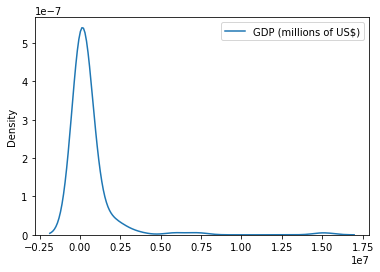

In [11]:
sns.kdeplot(df)

1. Kiểm định:
Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm

Phát biểu giả thuyết:
+ H0: Trung bình GDP của các quốc gia bằng 500 tỷ
+ H1: Trung bình GDP của các quốc gia khác 500 tỷ

In [14]:
print(stats.ttest_1samp(df['GDP (millions of US$)'], 500))

Ttest_1sampResult(statistic=3.7618446272211066, pvalue=0.0002588173871939586)


Kết luận: với P_value < 0.05, vì vậy căn cứ trên dữ liệu chưa đủ để kết luận giả thuyết H0 đúng, chấp nhận giả thuyết H1.

2. GDP trung bình ở các quốc gia ở châu Âu cao hơn châu Á không

<AxesSubplot:ylabel='Density'>

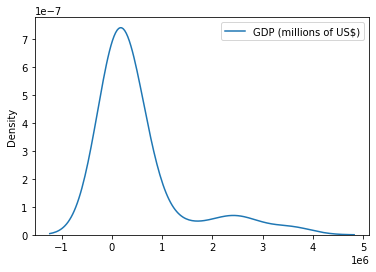

In [23]:
df_eu = df[df['Continent']=='Europe']

df_asian = df[df['Continent']=='Asia']

eu = df_eu['GDP (millions of US$)'].tolist()

asi = df_asian['GDP (millions of US$)'].tolist()

sns.kdeplot(df_eu)

<AxesSubplot:ylabel='Density'>

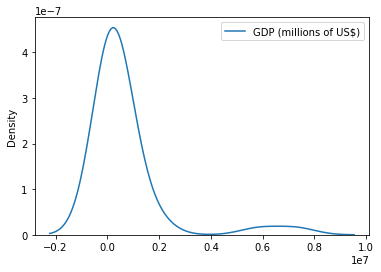

In [25]:
sns.kdeplot(df_asian)

Phát biểu giả thuyết:
+ Ho: GDP trung bình của quốc gia Châu Âu bằng Châu á
+ H1: GDP trung bình Châu Âu cao hơn Châu Ấ

In [28]:
print(stats.ttest_ind(df_asian['GDP (millions of US$)'], df_eu['GDP (millions of US$)'],equal_var=False))

Ttest_indResult(statistic=0.5546583491057376, pvalue=0.5813877404597693)


Kết luận: Với P_value > 0.05, căn cứ dữ liệu ghi nhận chấp nhân giả thuyết H0

3.GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau

In [30]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [43]:
df_american = df.loc[df['Continent'].isin(['South America','North America'])]

Phát biểu giả thuyết:
+ H0:GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau
+ H1: GDP trung bình của các quốc gia ở châu Âu khác châu Mỹ

In [40]:
print(stats.ttest_ind(df_american['GDP (millions of US$)'], df_eu['GDP (millions of US$)'],equal_var=False))

Ttest_indResult(statistic=0.7882914270473153, pvalue=0.4396139393183093)


Kết luận: Với P_value >0.05 vì vậy chấp nhận giả thuyết H0